# **Predicting The Survivals of the Ttanic disaster Using Machine Learning**

This notebook will introduce some foundation machine learning and data science concepts by exploring the Titanic Data  for **classification**.

## 1. **Problem Definition**
The problem we will be exploring is **binary classification** (a sample can only be one of two things).



## 2. **Data**
We downloade the data from [Kaggle](https://www.kaggle.com/competitions/titanic/data)



## 3. **Evaluation**

If we can reach 95% accuracy at predicting whether or not a paassenger survived during the proof of concept, we'll pursure this project.



## 4. **Features**

Feature importance was done to see the features/columns that best contribute to the ML model.


## Preparing the tools
The libraries used are:
* [pandas](https://pandas.pydata.org/) for data analysis.
* [NumPy](https://numpy.org/) for numerical operations.
* [Matplotlib](https://matplotlib.org/)/[seaborn](https://seaborn.pydata.org/) for plotting or data visualization.
* [Scikit-Learn](https://scikit-learn.org/stable/) for machine learning modelling and evaluation.

In [ ]:
#Python Data Visualization Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
data = pd.read_csv("/content/data.csv")
data.shape

(891, 12)

**Clearly, there are 891 samples and 12 features in the original dataset provided by Kaggle for this excecise.** https://www.kaggle.com/competitions/titanic/data


In [ ]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
data.info() #Checking the data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data['Sex'] = data['Sex'].map({'male': 1, 'female': 0}) #Conversion
                     #Of gender column to 0 & 1 where 0 is female
                     #And 1 is male

The "Sex" column was converted to 0 and 1 where 0 represent female and 1 represent male.

In [ ]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have some missing data in the following columns [Age, Cabin, Embarked].

**Note**: All target class (Suvived) is available.

**Data Exploration**
The aim of data exploration is to understand the data so as to make informned decision while building the model.

For my curiosity, in this part, I want to understand if the cabin class, gender, or title the passengers held in society contribute to their survival chance.

From this simple barchart, we can establish that there are more males in the titanic than female.

We have about 263 more males than females in the training set Kaggle provided.

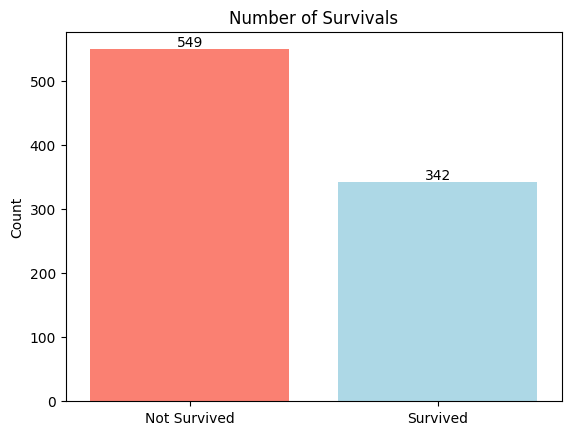

In [ ]:
counts_label = data['Survived'].value_counts()

bars = plt.bar(counts_label.index, counts_label.values, color=['Salmon', 'lightblue'])
plt.ylabel('Count')
plt.title('Number of Survivals')

plt.gca().set_xticks(counts_label.index)
plt.gca().set_xticklabels(['Not Survived', 'Survived'])
# Adjust the x-tick positions to center them with the bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{counts_label.values[i]}',
             ha='center', va='bottom')
plt.xlim(-0.5, 1.5);

Now, it is established that 342 passengers survived the crash while 549 passengers does not. This means about 40% survived the crash. Note: This analysis is based on the kaggle training data provided. https://www.kaggle.com/competitions/titanic/data

<ipython-input-12-fa05a12537fa>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Female', 'Male'])


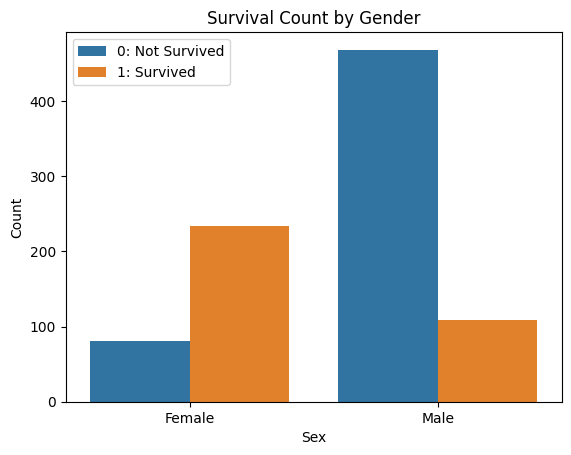

In [ ]:
ax = sn.countplot(x='Sex', hue='Survived', data=data)
ax.set_xticklabels(['Female', 'Male'])
handles, labels = ax.get_legend_handles_labels()
new_labels = ['0: Not Survived', '1: Survived']
ax.legend(handles, new_labels)
plt.ylabel('Count')
plt.title('Survival Count by Gender');

Now, because the ratio of male to female is unequal, we can not determine if more males survive than females. Let us try something.

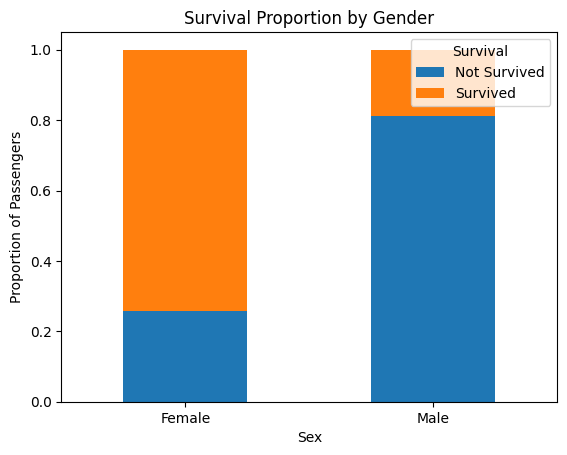

In [ ]:
total_passengers = data.groupby('Sex')['Survived'].count()
survival_count = data.groupby(['Sex', 'Survived']).size().unstack()
survival_proportion = survival_count.div(total_passengers, axis=0)
ax = survival_proportion.plot(kind='bar', stacked=True)
ax.set_xticklabels(['Female', 'Male'], rotation=0)
plt.ylabel('Proportion of Passengers')
plt.title('Survival Proportion by Gender')
legend_labels = ['Not Survived', 'Survived']
ax.legend(title='Survival', labels=legend_labels);

To address the difference in the number of males and females in the dataset while analyzing survival rates,we can normalize the count of survivors by the total count of each gender. This will allow us to compare survival rates rather than raw counts. Cool, right!

Now, we can conclude that more females survived the crash as compared to male.
This is not surprising as it is well documented that Captain Edward Smith issued the command "Women first" when the collision occurred, and indeed, many women were rescued as a result. Nonetheless, there were individuals who were unable to be saved despite these efforts.

Now, to answer our next question in this exploration phase which is if the title of the passengers contribute to their survival. Let us dive into feature engineering.

In [ ]:
#Extract titles from the name column
#The intention is to see if title contributes to survival rate
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
print(data['Title'].value_counts())

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64


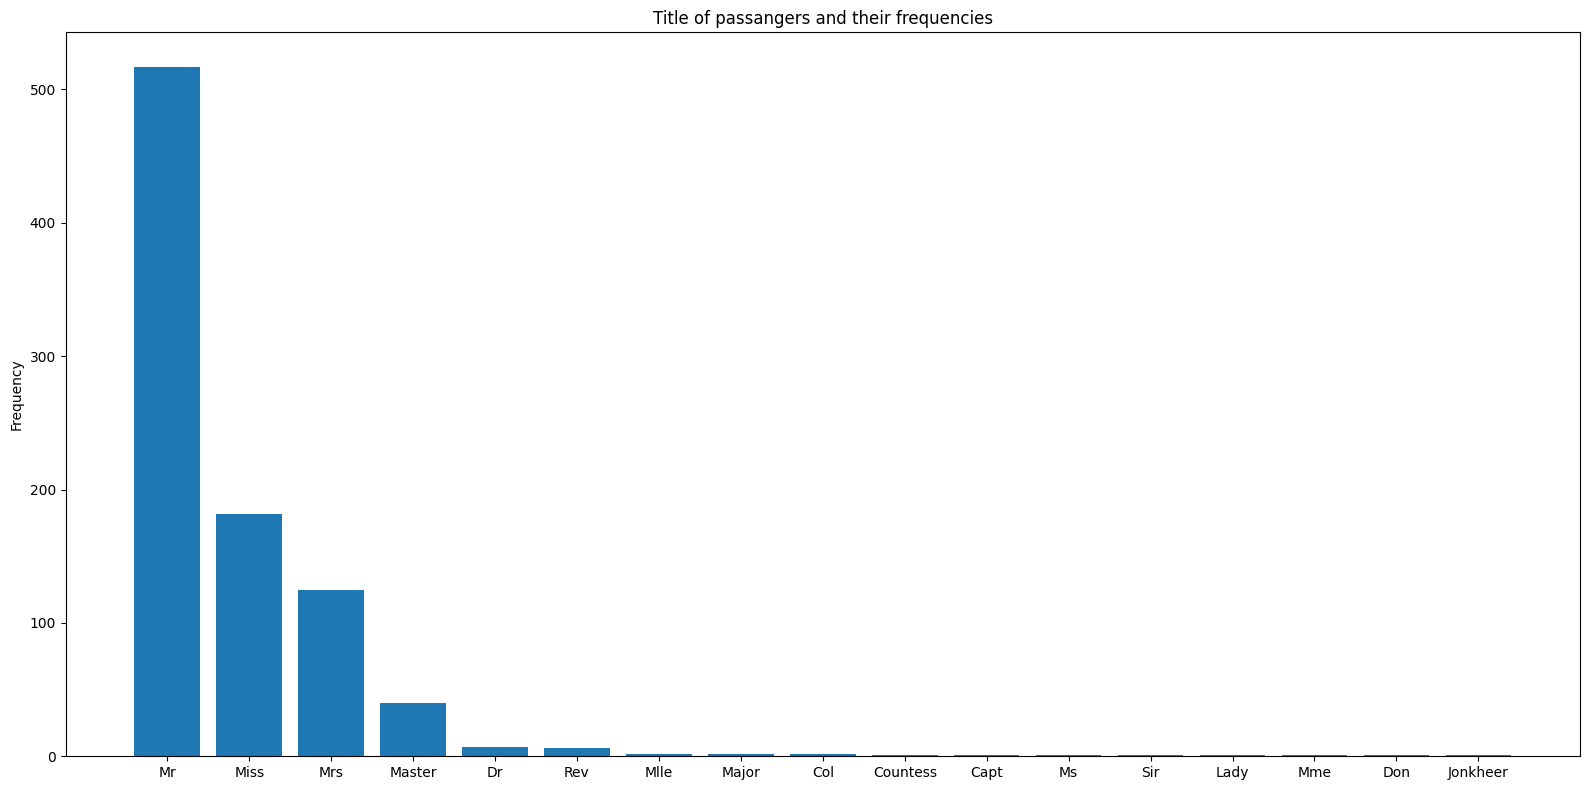

In [ ]:
count_assign = data['Title'].value_counts()
fig, ax = plt.subplots(figsize = (16, 8))
ax.bar(count_assign.index, count_assign.values)
ax.set(ylabel = 'Frequency',
       title = 'Title of passangers and their frequencies')
plt.tight_layout()

This barchart shows the different titles of the passengers in the training set and their frequeency.

In [ ]:
# Map titles to categories
title_mapping = {
    'Mr': 'Mr',
    'Miss': 'Miss',
    'Mrs': 'Mrs',
    'Master': 'Master',
    'Dr': 'Dr',
    'Rev': 'Rev',
    'Col': 'Officer',
    'Major': 'Officer',
    'Mlle': 'Miss',
    'Countess': 'Royalty',
    'Ms': 'Miss',
    'Lady': 'Royalty',
    'Jonkheer': 'Royalty',
    'Don': 'Royalty',
    'Mme': 'Mrs',
    'Capt': 'Officer',
    'Sir': 'Royalty'
}
data['Title'] = data['Title'].map(title_mapping)
data.drop(columns=['Name'], inplace=True)
# One-hot encode 'Title' column
data = pd.get_dummies(data, columns=['Title'])

**One-hot encoding is a technique used to convert categorical variables into a binary format that can be provided to ML algorithms to improve model performance. It creates a binary column for each category in the categorical variable.**

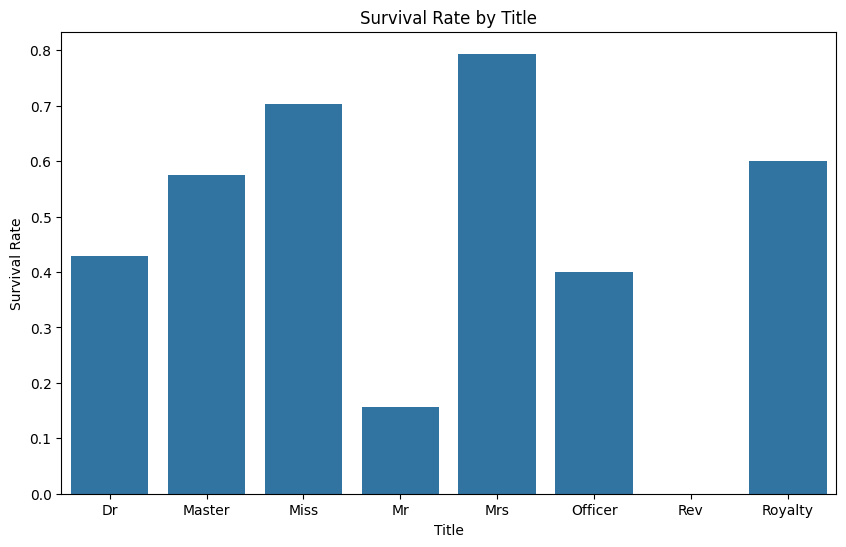

In [ ]:
# Calculate survival rate for each title category
title_survival_rate = {}
for column in data.columns:
    if column.startswith('Title_'):
        title = column.split('_')[1]
        survived_rate = data[data[column] == True]['Survived'].mean()
        title_survival_rate[title] = survived_rate

plt.figure(figsize=(10, 6))
sn.barplot(x=list(title_survival_rate.keys()), y=list(title_survival_rate.values()))
plt.xlabel('Title')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Title');

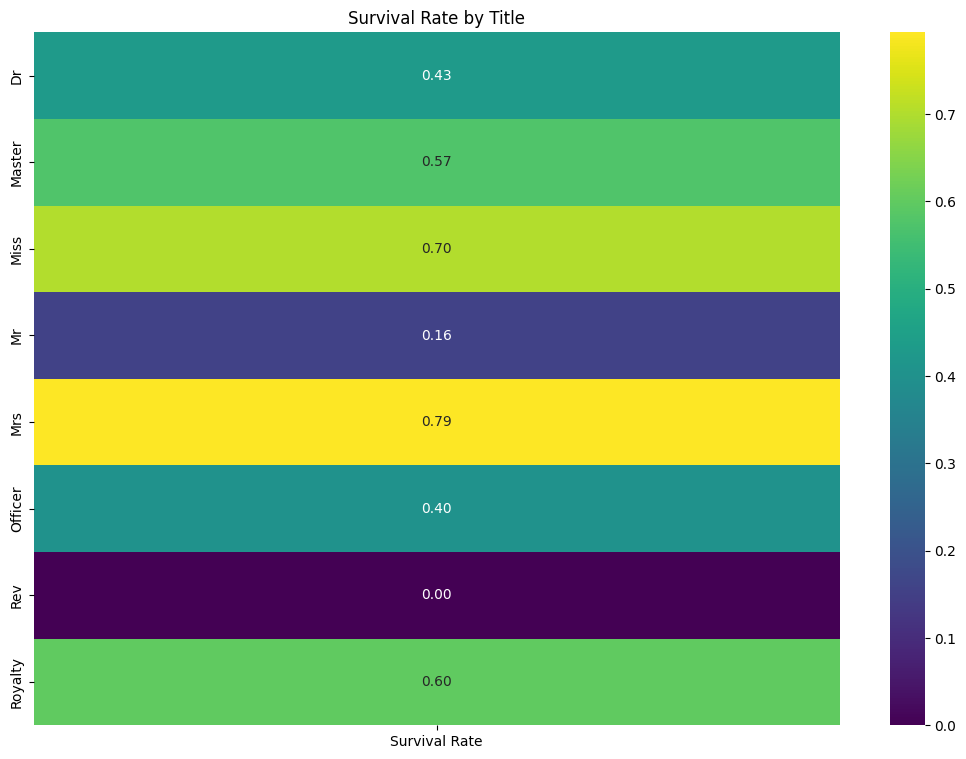

In [ ]:
#We also used heatmap to visualize the data
title_survival_df = pd.DataFrame.from_dict(title_survival_rate, orient='index', columns=['Survival Rate'])
plt.figure(figsize=(13, 9))
sn.heatmap(title_survival_df, annot=True, cmap='viridis', fmt=".2f")
plt.title('Survival Rate by Title');

Just like gender, the title also played a role as we see that Mrs & Miss have more survival.

The last question for me to conclude this exploratory phase is if cabin class contributes to survival. Like first class cabin passengers when compared to third class. Let us see 😀!

In [ ]:
count_pclass = data.Pclass.value_counts()

In [ ]:
count_pclass

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

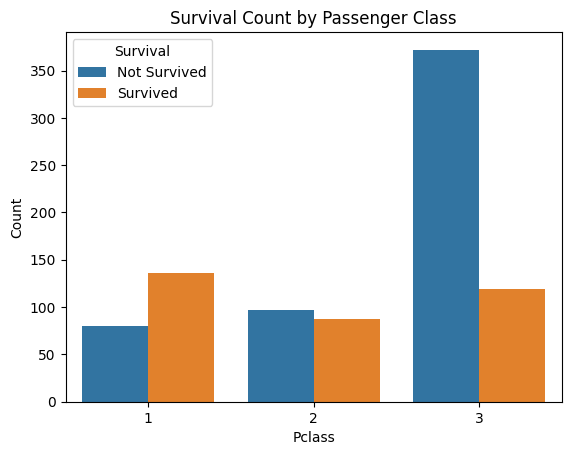

In [ ]:
ax = sn.countplot(x='Pclass', hue='Survived', data=data)
plt.ylabel('Count')
plt.title('Survival Count by Passenger Class')
legend_labels = ['Not Survived', 'Survived']
ax.legend(title='Survival', labels=legend_labels);

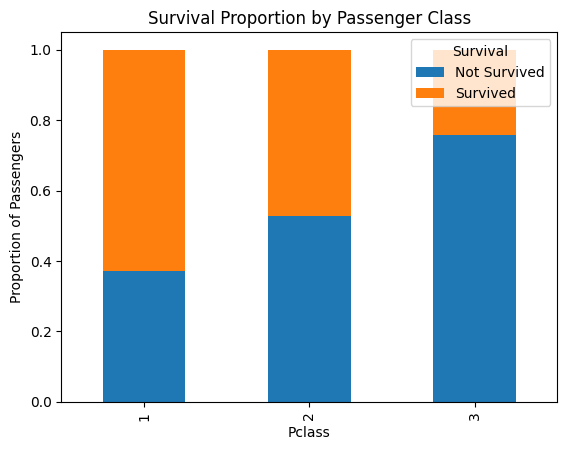

In [ ]:
total_passengers = data.groupby('Pclass')['Survived'].count()
survival_count = data.groupby(['Pclass', 'Survived']).size().unstack()
survival_proportion = survival_count.div(total_passengers, axis=0)
ax = survival_proportion.plot(kind='bar', stacked=True)
plt.ylabel('Proportion of Passengers')
plt.title('Survival Proportion by Passenger Class')
legend_labels = ['Not Survived', 'Survived']
ax.legend(title='Survival', labels=legend_labels);

First Class passengers has higher percentage of survival as compared to other classes. This implies the amount paid contributed to the priorities given to passengers as the disaster unfolds.

In [ ]:
data.describe() #Exploring a quick description of the dataset

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Sex            891 non-null    int64  
 4   Age            714 non-null    float64
 5   SibSp          891 non-null    int64  
 6   Parch          891 non-null    int64  
 7   Ticket         891 non-null    object 
 8   Fare           891 non-null    float64
 9   Cabin          204 non-null    object 
 10  Embarked       889 non-null    object 
 11  Title_Dr       891 non-null    bool   
 12  Title_Master   891 non-null    bool   
 13  Title_Miss     891 non-null    bool   
 14  Title_Mr       891 non-null    bool   
 15  Title_Mrs      891 non-null    bool   
 16  Title_Officer  891 non-null    bool   
 17  Title_Rev      891 non-null    bool   
 18  Title_Roya

In [ ]:
data.drop(['Cabin', 'Embarked'], axis = 1, inplace = True) #We dropped this
                      #Column because they have lots of non-null and we do not
                      #believe they will contribute much to our model

**Most machine learning algorithms do not work directly with object data types. Hence, let us perform one-hot encoding for all the categorical data types.**

**Feature Encoding**

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Rev,Title_Royalty
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,False,False,False,True,False,False,False,False
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,False,False,False,False,True,False,False,False
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,False,False,True,False,False,False,False,False
3,4,1,1,0,35.0,1,0,113803,53.1000,False,False,False,False,True,False,False,False
4,5,0,3,1,35.0,0,0,373450,8.0500,False,False,False,True,False,False,False,False


In [ ]:
# One-hot encode string columns
data_encoded = pd.get_dummies(data, columns=['Ticket'])
data_encoded.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Dr,Title_Master,...,Ticket_STON/O2. 3101290,Ticket_SW/PP 751,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735
0,1,0,3,1,22.0,1,0,7.2500,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1,1,0,38.0,1,0,71.2833,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,0,26.0,0,0,7.9250,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,1,1,0,35.0,1,0,53.1000,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,0,3,1,35.0,0,0,8.0500,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data_encoded.shape

(891, 697)

**Creating a correlation Matrix**

In [ ]:
correlation_matrix = data_encoded.corr()
print(correlation_matrix['Survived'])

PassengerId          -0.005007
Survived              1.000000
Pclass               -0.338481
Sex                  -0.543351
Age                  -0.077221
                        ...   
Ticket_W./C. 6608    -0.053002
Ticket_W./C. 6609    -0.026456
Ticket_W.E.P. 5734   -0.026456
Ticket_W/C 14208     -0.026456
Ticket_WE/P 5735      0.011329
Name: Survived, Length: 697, dtype: float64


**Note**: I am taking a subset to save time between run as about 697 features has
been generated after the feature encoding process.

Below are the description of the extracted features.

*   **Survived**: Depicting whether the patient survived or not
*   **pclass**: A proxy for socio-economic status (SES)
*   **Sex**: Whether the passenger is a male or female
*   **Age**: The age of the passengers
*   **sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
*   **parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.
*   **Fare**: Amount each passenger paid based on cabin class.

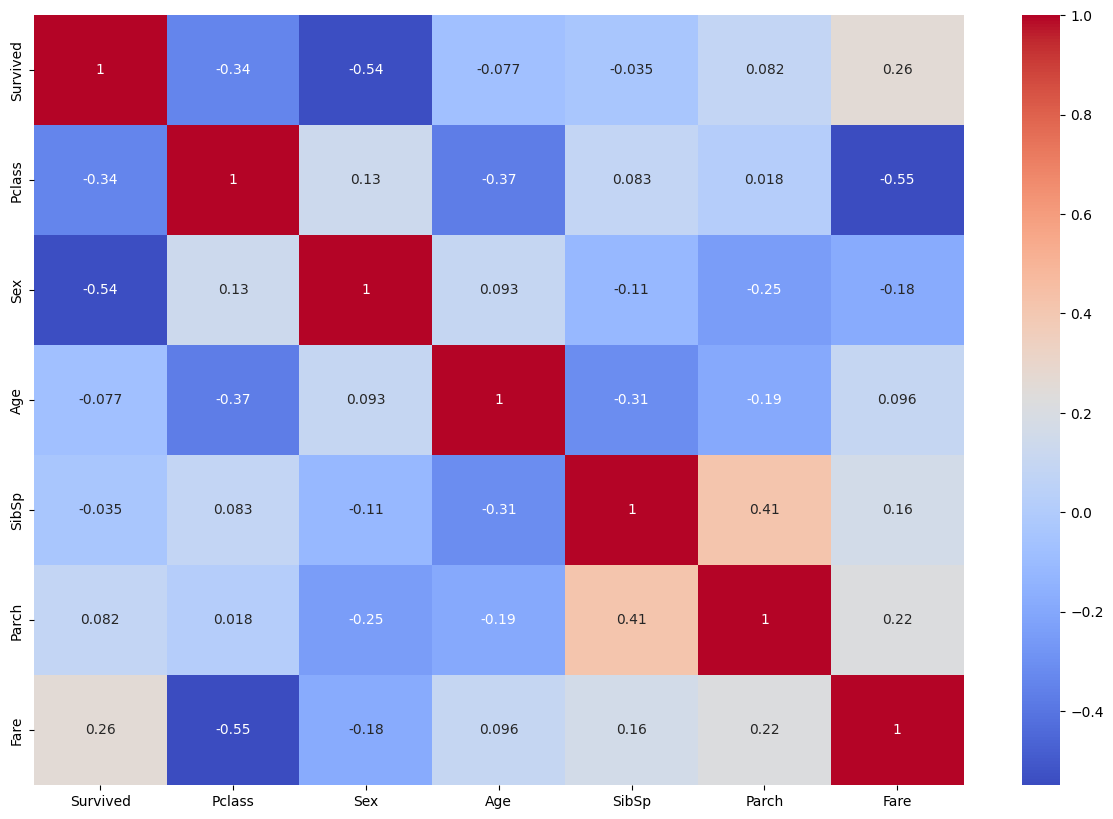

In [ ]:
plt.figure(figsize=(15, 10))
# Select a subset of features to visualize
subset_features = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
subset_corr_matrix = data[subset_features].corr()
sn.heatmap(subset_corr_matrix, annot=True, cmap='coolwarm');

In [ ]:
data_encoded.drop('Age', axis =1, inplace = True) #The age column will not
                 #contribute to the model significantly looking at the heatmap

In [ ]:
processed_data = data_encoded.copy()
processed_data.shape, data_encoded.shape

((891, 696), (891, 696))

In [ ]:
processed_data.isna().sum() #Checking for missing values

PassengerId           0
Survived              0
Pclass                0
Sex                   0
SibSp                 0
                     ..
Ticket_W./C. 6608     0
Ticket_W./C. 6609     0
Ticket_W.E.P. 5734    0
Ticket_W/C 14208      0
Ticket_WE/P 5735      0
Length: 696, dtype: int64

**No missing values in our datasets and now, we can proceed with confidence.**

**Checking if the dataset is balanced/imbalanced**

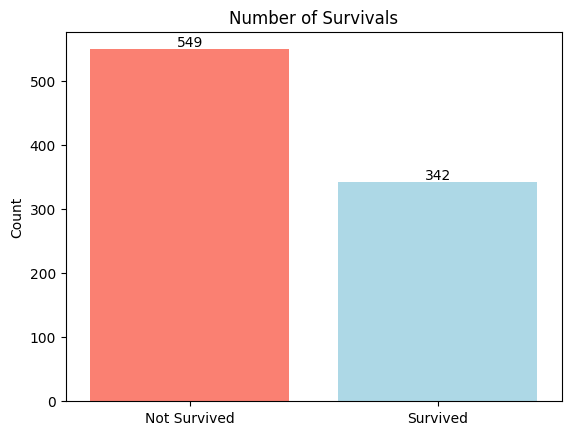

In [ ]:
counts_label = data['Survived'].value_counts()

bars = plt.bar(counts_label.index, counts_label.values, color=['Salmon', 'lightblue'])
plt.ylabel('Count')
plt.title('Number of Survivals')

plt.gca().set_xticks(counts_label.index)
plt.gca().set_xticklabels(['Not Survived', 'Survived'])
# Adjust the x-tick positions to center them with the bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{counts_label.values[i]}',
             ha='center', va='bottom')
plt.xlim(-0.5, 1.5);

In [ ]:
data['Survived'].value_counts(normalize = True) ##Each value represent the
                      # proportion of that value in the total number of samples.

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

**Data Splitting for Machine Learning Purpose**

Carefully splitting the data is neccessary because of its imbalanced nature. This can help prevent the model from being biased towards the majority class and improve its ability to generalize to unseen data.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val = train_test_split(processed_data, test_size = 0.2,
                                   stratify = processed_data['Survived'],
                                   random_state = 99)

In [ ]:
x_train.shape,  x_val.shape

((712, 696), (179, 696))

In [ ]:
x_train['Survived'].value_counts(), x_val['Survived'].value_counts()

(Survived
 0    439
 1    273
 Name: count, dtype: int64,
 Survived
 0    110
 1     69
 Name: count, dtype: int64)

In [ ]:
x_train['Survived'].value_counts(normalize = True), x_val['Survived'].value_counts(normalize = True) #Now
           #We were able to preserve the distibution of our datasets
           #Even after splitting into train and validation sets

(Survived
 0    0.616573
 1    0.383427
 Name: proportion, dtype: float64,
 Survived
 0    0.614525
 1    0.385475
 Name: proportion, dtype: float64)

In [ ]:
y_train = x_train['Survived']
x_train = x_train.drop('Survived', axis = 1) # This is to split the target
            #class from the remaining features for integrity purpose for the
            #model

In [ ]:
y_val = x_val['Survived']
x_val = x_val.drop('Survived', axis = 1)# The remaining 20% of the data
            #will be used for validation before we test our model on test data
            #provided by Kaggle

In [ ]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((712, 695), (712,), (179, 695), (179,))

**Note how we we were able to maintain the data distribution using the stratify method when splitting the data**

**Handling The Imbalanced dataset SMOTE**

**SMOTE** stands for Synthetic Minority Over-sampling Technique. It is a method used to address the class imbalance problem in machine learning datasets, particularly in classification tasks where one class is more prevalent than the others.

In [ ]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=99)

# Resample the training data
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
x_train_resampled.shape, y_train_resampled.shape

((878, 695), (878,))

In [ ]:
# Instantiate SMOTE
smote = SMOTE(random_state=99)

# Resample the training data
x_val_resampled, y_val_resampled = smote.fit_resample(x_val, y_val)
x_val_resampled.shape, y_val_resampled.shape

((220, 695), (220,))

**Time to build the ML models**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#### Why these?

If we look at the [Scikit-Learn algorithm cheat sheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), we can see we're working on a classification problem and these are the algorithms it suggests (plus a few more).


Attached link explains logistic regression [a model for classification](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression).

Scikitlearn also has good resources on KNC and RF. You can check them out 😀:

Since our dataset is relatively small, we can experiment to find algorithm performs best.

All of the algorithms in the Scikit-Learn library use the same functions, for training a model, `model.fit(X_train, y_train)` and for scoring a model `model.score(X_test, y_test)`. `score()` returns the ratio of correct predictions (1.0 = 100% correct).

Since the algorithms we've chosen implement the same methods for fitting them to the data as well as evaluating them, let's put them in a dictionary and create a which fits and scores them.

In [ ]:
models = {'RFC': RandomForestClassifier(),
          'KNC': KNeighborsClassifier(),
          'LR': LogisticRegression()}
results = {}

In [ ]:
for model_name, model in models.items():
    np.random.seed(42)
    model.fit(x_train_resampled, y_train_resampled)
    results[model_name] = model.score(x_val_resampled, y_val_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
results

{'RFC': 0.8727272727272727,
 'KNC': 0.5909090909090909,
 'LR': 0.8636363636363636}

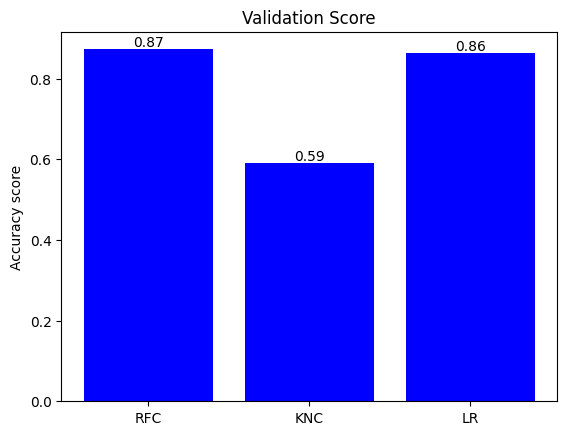

In [ ]:
bars = plt.bar(results.keys(), results.values(), color='blue')
plt.title('Validation Score')
plt.ylabel('Accuracy score')

# Add text annotations above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom');

**Hyperparameter tuning** involves finding the optimal hyperparameters for a machine learning algorithm to improve its performance. Now, let us see if the model can be improved.

We will be focusing on tuning logistic regression model and the Random Forest as they performed better than the KNC model.

In [ ]:
#creating for logistic regression
log_reg_grid = {"C" : np.logspace(-4, 4, 20),
                'solver': ['liblinear']}
#create hyperparameter grid for random forest classifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf":np.arange(1, 20, 2)}

We have declared the **hyperparameter grids** for both the logistic regression and random forest classifier. These grids define the ranges of **hyperparameters** that we want to explore during the hyperparameter tuning process.

In [ ]:
#Logistic Regression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
np.random.seed(42)
RS_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                n_iter = 20,
                                cv = 5,
                                verbose = True)

RS_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
RS_log_reg.best_params_

{'solver': 'liblinear', 'C': 10000.0}

In [ ]:
RS_log_reg.score(x_val, y_val)

0.8547486033519553

In [ ]:
#Random Forest
np.random.seed(42)
RS_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           n_iter = 20,
                           verbose = True,
                           cv = 5)
RS_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
RS_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [ ]:
RS_rf.score(x_val, y_val)

0.8603351955307262

In [ ]:
RS_rf.score(x_val, y_val), RS_log_reg.score(x_val, y_val) #Random Forest and
                                                          #Logistic Regression

(0.8603351955307262, 0.8547486033519553)

**Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_preds_log_reg = RS_log_reg.predict(x_val)
y_preds_rf = RS_rf.predict(x_val)

In [ ]:
accuracy_score(y_preds_log_reg, y_val), accuracy_score(y_preds_rf, y_val)

(0.8547486033519553, 0.8603351955307262)

**Let us utilize cross validation score**



Cross-validation (CV) is a technique used in machine learning to assess the performance and generalization ability of a model. The main reason for performing cross-validation is to obtain reliable estimates of the model's performance on unseen data.

In [ ]:
log_reg_cv = LogisticRegression(C = 1438.44988828766,
                         solver = 'liblinear',
                         random_state = 42)
log_reg_cv.fit(x_train, y_train)
rf_cv = RandomForestClassifier(n_estimators=510, min_samples_split=14,
                               min_samples_leaf=1, max_depth=None,
                               random_state=42)

In [ ]:
processed_data_y = processed_data['Survived']
processed_data_x = processed_data.drop('Survived', axis = 1)
# Instantiate SMOTE
smote = SMOTE(random_state=99)

# Resample the training data
x, y = smote.fit_resample(processed_data_x, processed_data_y)
x.shape, y.shape

((1098, 695), (1098,))

In [ ]:
cv_acc_log_reg = cross_val_score(log_reg_cv,
                         x,
                         y,
                         cv = 5,
                         scoring = 'accuracy')
cv_acc_log_reg

array([0.81363636, 0.83181818, 0.79090909, 0.9543379 , 0.92694064])

In [ ]:
cv_acc_rf = cross_val_score(rf_cv,
                         x,
                         y,
                         cv = 5,
                         scoring = 'accuracy')
cv_acc_rf

array([0.81818182, 0.81818182, 0.73636364, 0.88584475, 0.54794521])

In [ ]:
np.mean(cv_acc_log_reg), np.mean(cv_acc_rf)

(0.8635284350352844, 0.7613034454130345)

Logistic Regression gave 86% accuracy. Thia shows LR shows more generalization across the data.

Hence, the LR is our most trusted model for this excercise.

**Feature Importance**

What now?

The final thing to check off the list of our model evaluation techniques is feature importance.

## Feature importance

Feature importance is another way of asking, "which features contributing most to the outcomes of the model?"

Or for our problem, trying to predict survival rate using passenger data characterisitcs, which charateristics contribute most to a model predicting whether someone survived or not?

Unlike some of the other functions we've seen, because how each model finds patterns in data is slightly different, how a model judges how important those patterns are is different as well. This means for each model, there's a slightly different way of finding which features were most important.

You can usually find an example via the Scikit-Learn documentation or via searching for something like "[MODEL TYPE] feature importance", such as, "random forest feature importance".

Since we're using `LogisticRegression`, we'll look at one way we can calculate feature importance for it.

To do so, we'll use the `coef_` attribute. Looking at the [Scikit-Learn documentation for `LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), the `coef_` attribute is the coefficient of the features in the decision function.

We can access the `coef_` attribute after we've fit an instance of `LogisticRegression`.

In [ ]:
log_reg_cv.coef_

array([[ 2.60264046e-04, -1.62032700e+00, -4.15754360e+00,
        -1.32549794e+00, -7.35695174e-01,  1.53501903e-02,
        -8.87251270e-01,  7.20268485e+00,  2.40817192e+00,
        -1.62858536e+00,  3.17359523e+00, -8.14174413e-01,
        -3.99628838e+00, -4.48523500e-01,  1.68670992e+00,
        -1.41824038e+00, -4.02351798e+00,  5.93266253e+00,
         4.83670403e-01, -3.12686052e+00, -3.24751412e+00,
         9.17789008e-01,  5.78818690e+00,  5.89335890e+00,
         5.91539094e+00,  5.98584393e+00, -2.95249885e+00,
        -2.91145781e+00,  5.25349038e-01, -2.95461000e+00,
        -2.82073396e+00,  5.93241966e+00, -3.95513957e+00,
        -3.18823547e+00, -3.11674757e+00, -4.06952919e+00,
        -3.13864251e+00,  5.83452301e+00, -3.08051862e+00,
         0.00000000e+00, -3.23861619e+00, -3.77105211e+00,
         9.43960589e-01, -2.83101337e+00, -3.18606513e+00,
        -3.07808990e+00,  4.42476457e-01,  7.11755533e+00,
        -3.29575913e+00,  0.00000000e+00, -1.92834773e+0

In [ ]:
features_dict = dict(zip(processed_data.columns, list(log_reg_cv.coef_[0])))
features_subset = dict(list(features_dict.items())[:7])
features_subset

{'PassengerId': 0.0002602640462699422,
 'Survived': -1.6203269953720139,
 'Pclass': -4.157543598113111,
 'Sex': -1.3254979381273997,
 'SibSp': -0.7356951739008896,
 'Parch': 0.01535019034994299,
 'Fare': -0.8872512702437428}

The logistic regression analysis reveals several significant factors influencing the survival likelihood of passengers aboard the Titanic. Notably, passenger class emerges as a crucial determinant, with individuals in higher classes exhibiting substantially greater odds of survival compared to those in lower classes. Gender also plays a pivotal role, with females displaying a markedly higher probability of surviving than males. Moreover, the number of siblings/spouses aboard appears to negatively impact survival chances, suggesting that individuals with fewer accompanying family members may have had a higher likelihood of survival. Conversely, the presence of parents or children slightly increases the odds of survival.  These findings underscore the complex interplay of socioeconomic status, family composition, and gender dynamics in shaping survival outcomes during the Titanic disaster according to the Logistic Regression.

Note that a differemt model might rank the importance of each features differently depending on working principles.

Check this out: https://shorturl.at/nyNO1

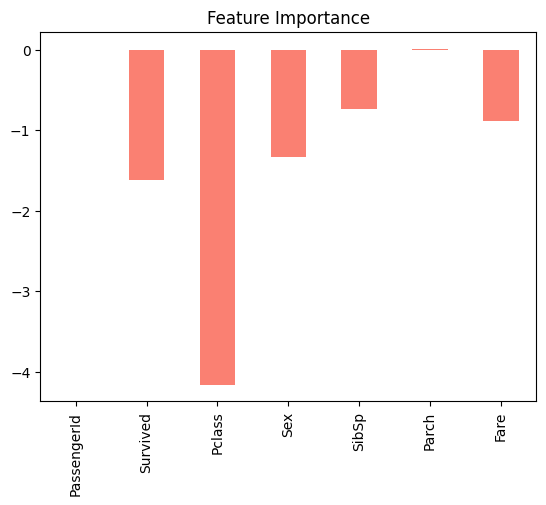

In [ ]:
# Visualize feature importance
features_df = pd.DataFrame(features_subset, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False, color = 'salmon');